##**GPU**

In [1]:
!nvidia-smi

Fri Aug  2 16:19:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# **Install**

In [2]:
!pip install torchmetrics

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

# **Imports 📢**

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch.backends.cudnn as cudnn

import torchvision
from torchvision.datasets import MNIST
from torchvision import transforms as T

import matplotlib.pyplot as plt
import numpy as np

from torchmetrics import Accuracy
from tqdm import tqdm

# **Dataset 🗂️**

## Transform

In [4]:
transform_train = T.Compose([
    T.RandomCrop(size=28, padding=4),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize((0.1307,), (0.3081,))
    ])

transform_test = T.Compose([
    T.ToTensor(),
    T.Normalize((0.1307,), (0.3081,))
    ])

## MNIST Dataset

In [5]:
train_set = MNIST(root='./MNIST', train=True, download=True, transform=transform_train)
test_set = MNIST(root='./MNIST', train=False, download=True, transform=transform_test)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4331046.42it/s]


Extracting ./MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 128734.92it/s]


Extracting ./MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1032801.27it/s]


Extracting ./MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 12871978.90it/s]

Extracting ./MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw



In [6]:
train_set

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./MNIST
    Split: Train
    StandardTransform
Transform: Compose(
               RandomCrop(size=(28, 28), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [7]:
test_set

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./MNIST
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [16]:
train_set[0][0].shape

torch.Size([1, 28, 28])

In [15]:
train_set[0]

(tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.424

In [9]:
train_set.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
# torch.FloatTensor(train_set.data/255).std(dim=[0, 1, 2])

## DataLoader

In [10]:
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

In [11]:
x_batch, y_batch = next(iter(train_loader))
print(x_batch.shape)
print(y_batch)

torch.Size([64, 1, 28, 28])
tensor([1, 0, 3, 1, 1, 7, 8, 1, 8, 1, 5, 0, 8, 4, 0, 7, 5, 1, 6, 9, 1, 5, 6, 6,
        0, 3, 7, 5, 8, 7, 8, 1, 5, 1, 6, 5, 1, 7, 9, 9, 7, 4, 5, 3, 2, 3, 1, 8,
        0, 0, 5, 7, 1, 5, 3, 5, 7, 7, 3, 3, 8, 4, 7, 2])


## Visualize

In [12]:
def normalize_image(image):
  image_min = image.min()
  image_max = image.max()
  image.clamp_(min = image_min, max = image_max)
  image.add_(-image_min).div_(image_max - image_min + 1e-5)
  return image

def plot_images(images, labels, classes, normalize=True):
  n_images = len(images)

  rows = int(np.sqrt(n_images))
  cols = int(np.sqrt(n_images))

  fig = plt.figure(figsize=(10, 10))

  for i in range(rows*cols):

    ax = fig.add_subplot(rows, cols, i+1)

    image = images[i]
    if normalize:
      image = normalize_image(image)

    ax.imshow(image.permute(1, 2, 0).cpu().numpy())
    ax.set_title(classes[labels[i]])
    ax.axis('off')

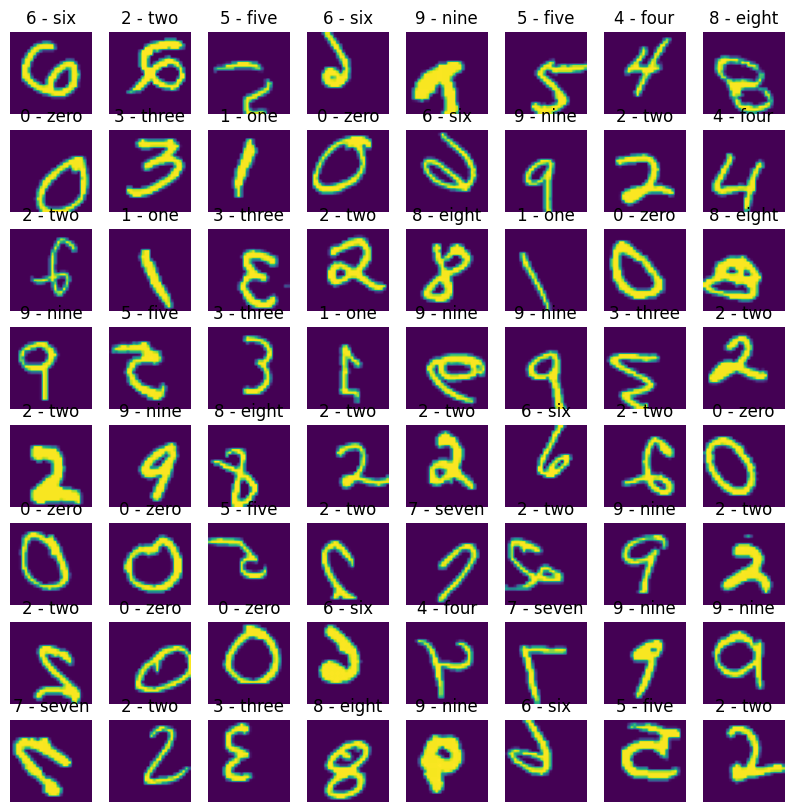

In [13]:
batch = next(iter(train_loader))
classes = train_set.classes
plot_images(batch[0], batch[1], classes)

# **Model 🧠**

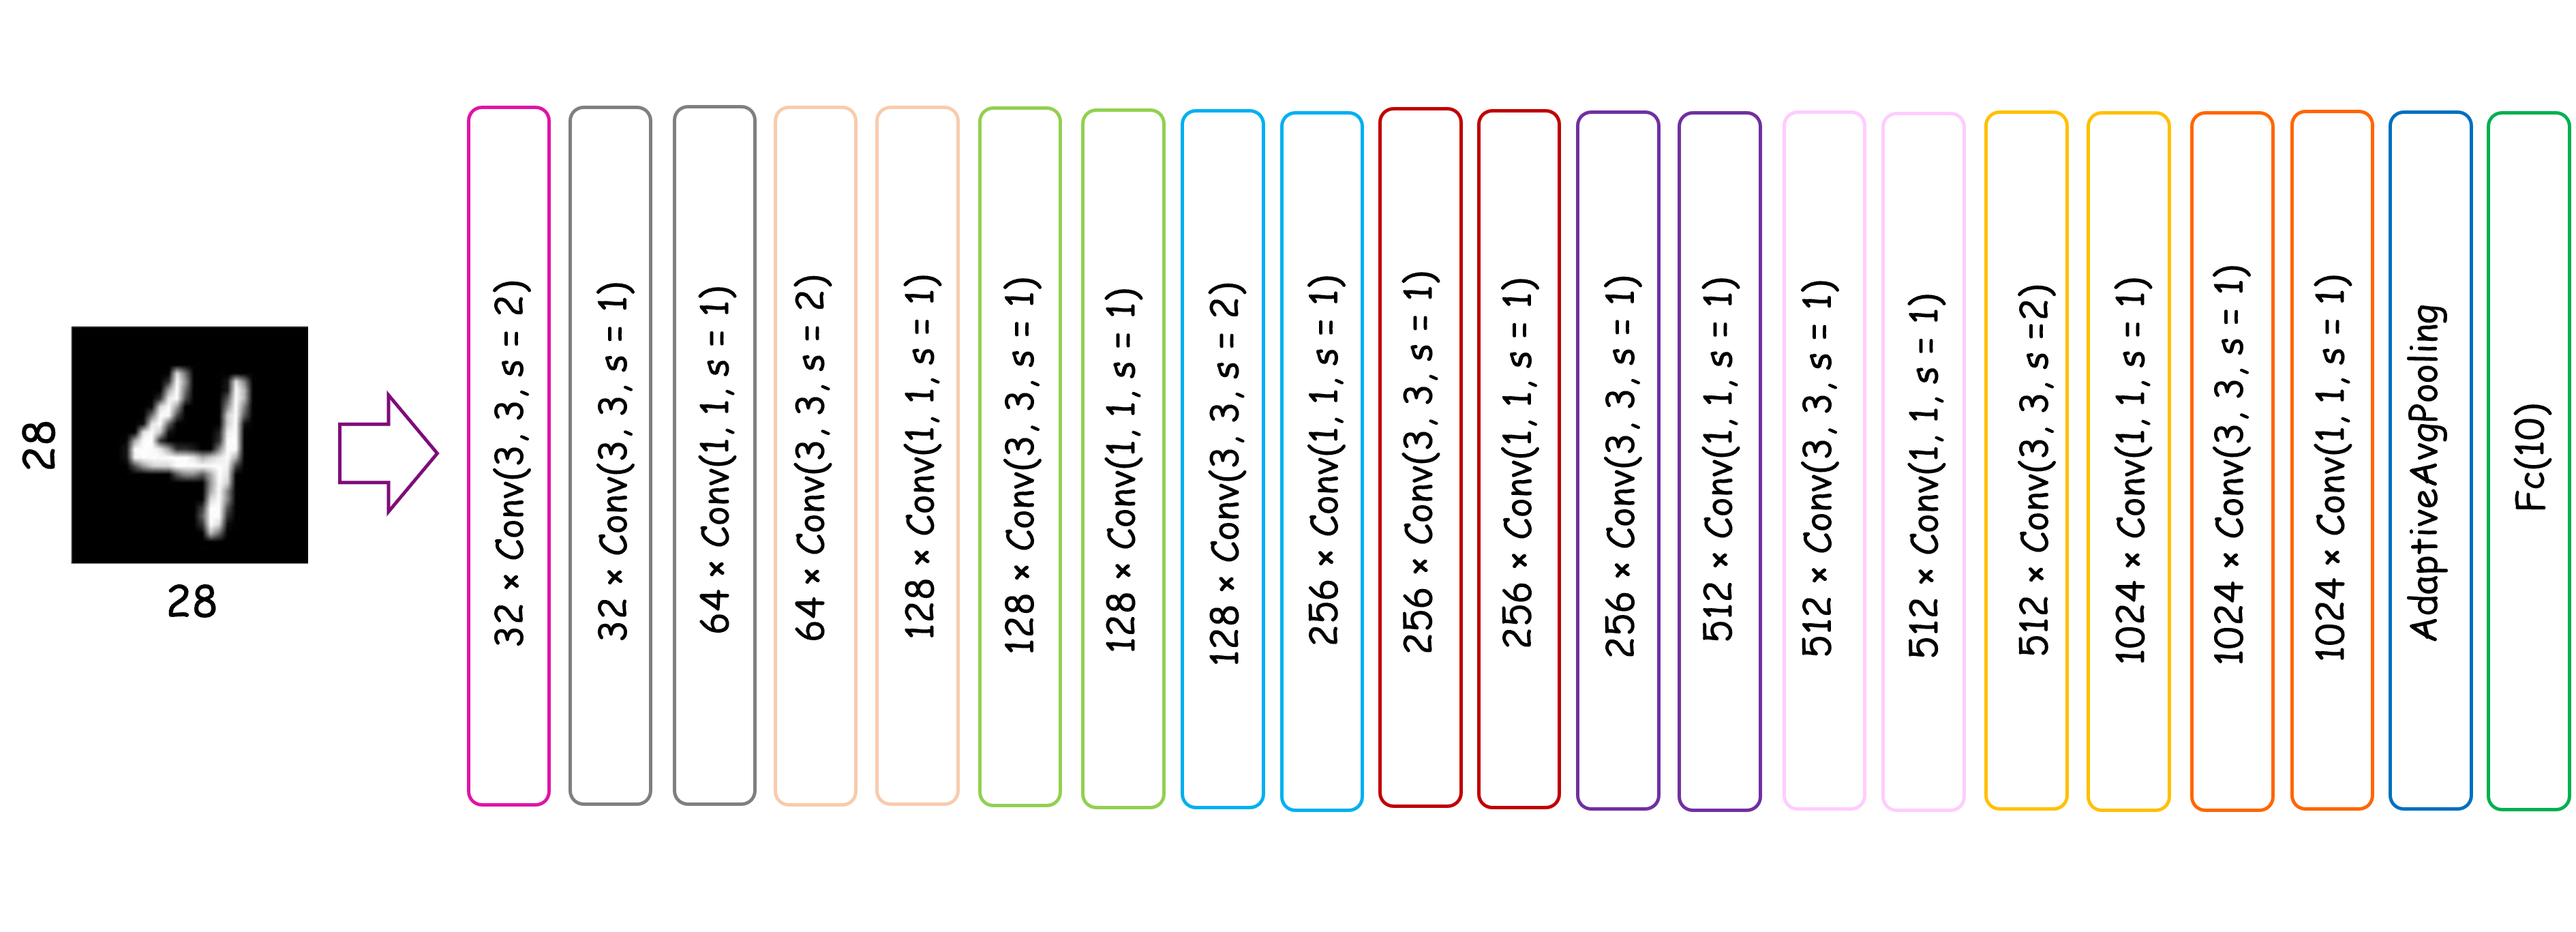

In [17]:
def CNN():
  network = nn.Sequential(
      nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=2, padding=1), #BSx1x14x14
      nn.BatchNorm2d(32),
      nn.ReLU(),

      nn.Conv2d(32, 32, 3, stride=1, padding=1), #BSx32x14x14
      nn.BatchNorm2d(32),
      nn.ReLU(),

      nn.Conv2d(32, 64, 1, stride=1, padding=1), #BSx64x16x16
      nn.BatchNorm2d(64),
      nn.ReLU(),

      nn.Conv2d(64, 64, 3, stride=2, padding=1), #BSx64x8x8
      nn.BatchNorm2d(64),
      nn.ReLU(),

      nn.Conv2d(64, 128, 1, stride=1, padding=1), #BSx128x10x10
      nn.BatchNorm2d(128),
      nn.ReLU(),

      nn.Conv2d(128, 128, 3, stride=1, padding=1), #BSx128x10x10
      nn.BatchNorm2d(128),
      nn.ReLU(),

      nn.Conv2d(128, 128, 1, stride=1, padding=1), #BSx128x12x12
      nn.BatchNorm2d(128),
      nn.ReLU(),

      nn.Conv2d(128, 128, 3, stride=2, padding=1), #BSx128x6x6
      nn.BatchNorm2d(128),
      nn.ReLU(),

      nn.Conv2d(128, 256, 1, stride=1, padding=1), #BSx256x8x8
      nn.BatchNorm2d(256),
      nn.ReLU(),

      nn.Conv2d(256, 256, 3, stride=1, padding=1), #BSx256x8x8
      nn.BatchNorm2d(256),
      nn.ReLU(),

      nn.Conv2d(256, 256, 1, stride=1, padding=1), #BSx256x10x10
      nn.BatchNorm2d(256),
      nn.ReLU(),

      nn.Conv2d(256, 256, 3, stride=1, padding=1), #BSx256x10x10
      nn.BatchNorm2d(256),
      nn.ReLU(),

      nn.Conv2d(256, 512, 1, stride=1, padding=1), #BSx512x12x12
      nn.BatchNorm2d(512),
      nn.ReLU(),

      nn.Conv2d(512, 512, 3, stride=1, padding=1), #BSx512x12x12
      nn.BatchNorm2d(512),
      nn.ReLU(),

      nn.Conv2d(512, 512, 1, stride=1, padding=1), #BSx512x14x14
      nn.BatchNorm2d(512),
      nn.ReLU(),

      nn.Conv2d(512, 512, 3, stride=2, padding=1), #BSx512x7x7
      nn.BatchNorm2d(512),
      nn.ReLU(),

      nn.Conv2d(512, 1024, 1, stride=1, padding=1), #BSx1024x9x9
      nn.BatchNorm2d(1024),
      nn.ReLU(),

      nn.Conv2d(1024, 1024, 3, stride=1, padding=1), #BSx1024x9x9
      nn.BatchNorm2d(1024),
      nn.ReLU(),

      nn.Conv2d(1024, 1024, 1, stride=1, padding=1), #BSx1024x11x11
      nn.BatchNorm2d(1024),
      nn.ReLU(),

      nn.AdaptiveAvgPool2d(output_size=(1, 1)), #BSx1024x1x1

      nn.Flatten(), #BSx1024
      nn.Linear(1024, 10) #BSx10
)

  return network

In [18]:
model = CNN()

In [19]:
model(torch.randn(64, 1, 28, 28)).shape

torch.Size([64, 10])

In [20]:
def num_params(model):
  nums = sum(p.numel() for p in model.parameters())/1e6
  return nums

In [21]:
num_params(model)

17.798506

# **Device ⚙️**

In [22]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1))
  (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU()
  (9): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): ReLU()
  (12): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1))
  (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): ReLU()
  (15): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (16): BatchNorm2d(128, eps=1e-05, 

# **Loss & Optimizer ⚖️**

In [23]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# **Utils 🧰**

In [24]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

# **Functions** 🧮

In [25]:
def train_one_epoch(model, train_loader, loss_fn, optimizer, epoch=None):
  model.train()
  loss_train = AverageMeter()
  acc_train = Accuracy(task='multiclass', num_classes=10).to(device)
  with tqdm(train_loader, unit="batch") as tepoch:
    for inputs, targets in tepoch:
      if epoch is not None:
        tepoch.set_description(f"Epoch {epoch}")
      inputs = inputs.to(device)
      targets = targets.to(device)

      outputs = model(inputs)

      loss = loss_fn(outputs, targets)

      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

      loss_train.update(loss.item())
      acc_train(outputs, targets.int())
      tepoch.set_postfix(loss=loss_train.avg,
                         accuracy=100.*acc_train.compute().item())
  return model, loss_train.avg, acc_train.compute().item()

In [26]:
def validation(model, test_loader, loss_fn):
  model.eval()
  with torch.no_grad():
    loss_valid = AverageMeter()
    acc_valid = Accuracy(task='multiclass', num_classes=10).to(device)
    for i, (inputs, targets) in enumerate(test_loader):
      inputs = inputs.to(device)
      targets = targets.to(device)

      outputs = model(inputs)
      loss = loss_fn(outputs, targets)

      loss_valid.update(loss.item())
      acc_valid(outputs, targets.int())
  return loss_valid.avg, acc_valid.compute().item()

# **Efficient way for set hyperparams 🔨**

## Step 1: check forward path

Calculate loss for one batch

In [27]:
x_batch, y_batch = next(iter(train_loader))
outputs = model(x_batch.to(device))
loss = loss_fn(outputs, y_batch.to(device))
print(loss)

tensor(2.2991, device='cuda:0', grad_fn=<NllLossBackward0>)


## Step 2: check backward path

Select 5 random batches and train the model

In [28]:
_, mini_train_dataset = random_split(train_set, (len(train_set)-1000, 1000))
mini_train_loader = DataLoader(mini_train_dataset, 20)

In [29]:
num_epochs = 10
for epoch in range(num_epochs):
  model, _, _ = train_one_epoch(model, mini_train_loader, loss_fn, optimizer, epoch)

Epoch 9: 100%|██████████| 50/50 [00:03<00:00, 16.03batch/s, accuracy=69, loss=0.962]


## Step 3: select best lr

Train all data for one epoch

In [30]:
num_epochs = 1
for lr in [0.1, 0.01, 0.001, 0.0001]:
  print(f'LR={lr}')
  model = CNN().to(device)
  optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=1e-4)
  for epoch in range(num_epochs):
    model, _, _ = train_one_epoch(model, train_loader, loss_fn, optimizer, epoch)
  print()

LR=0.1


Epoch 0: 100%|██████████| 938/938 [02:19<00:00,  6.71batch/s, accuracy=85.4, loss=0.425]



LR=0.01


Epoch 0: 100%|██████████| 938/938 [02:22<00:00,  6.58batch/s, accuracy=66.9, loss=0.965]



LR=0.001


Epoch 0: 100%|██████████| 938/938 [02:22<00:00,  6.58batch/s, accuracy=20.7, loss=2.18]



LR=0.0001


Epoch 0: 100%|██████████| 938/938 [02:22<00:00,  6.57batch/s, accuracy=13.4, loss=2.29]

## Step 4: small grid (optional)

Create a small grid based on the WD and the best LR



In [31]:
num_epochs = 2

for lr in [0.05, 0.1, 0.15]:
  for wd in [1e-4, 1e-5, 0.]:
    model = CNN().to(device)
    optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=wd)
    print(f'LR={lr}, WD={wd}')

    for epoch in range(num_epochs):
      model, loss, _ = train_one_epoch(model, train_loader, loss_fn, optimizer, epoch)
    print()

LR=0.05, WD=0.0001


Epoch 1: 100%|██████████| 938/938 [02:20<00:00,  6.65batch/s, accuracy=96.1, loss=0.131]



LR=0.05, WD=1e-05


Epoch 1: 100%|██████████| 938/938 [02:20<00:00,  6.68batch/s, accuracy=96, loss=0.129]



LR=0.05, WD=0.0


Epoch 1: 100%|██████████| 938/938 [02:19<00:00,  6.70batch/s, accuracy=96.1, loss=0.128]



LR=0.1, WD=0.0001


Epoch 1: 100%|██████████| 938/938 [02:20<00:00,  6.68batch/s, accuracy=95.8, loss=0.134]



LR=0.1, WD=1e-05


Epoch 1: 100%|██████████| 938/938 [02:21<00:00,  6.64batch/s, accuracy=96.2, loss=0.124]



LR=0.1, WD=0.0


Epoch 1: 100%|██████████| 938/938 [02:20<00:00,  6.66batch/s, accuracy=96.1, loss=0.126]



LR=0.15, WD=0.0001


Epoch 1: 100%|██████████| 938/938 [02:21<00:00,  6.63batch/s, accuracy=96, loss=0.132]



LR=0.15, WD=1e-05


Epoch 1: 100%|██████████| 938/938 [02:20<00:00,  6.66batch/s, accuracy=95.8, loss=0.138]



LR=0.15, WD=0.0


Epoch 1: 100%|██████████| 938/938 [02:20<00:00,  6.68batch/s, accuracy=96, loss=0.13]

## Step 5: train more epochs

In [32]:
model = CNN().to(device)

In [33]:
lr = 0.05
wd = 1e-4
optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=wd)

In [34]:
loss_train_hist = []
loss_valid_hist = []

acc_train_hist = []
acc_valid_hist = []

best_loss_valid = torch.inf
epoch_counter = 0

In [35]:
num_epochs = 20

for epoch in range(num_epochs):
  # Train
  model, loss_train, acc_train = train_one_epoch(model,
                                                 train_loader,
                                                 loss_fn,
                                                 optimizer,
                                                 epoch)
  # Validation
  loss_valid, acc_valid = validation(model,
                                     test_loader,
                                     loss_fn)

  loss_train_hist.append(loss_train)
  loss_valid_hist.append(loss_valid)

  acc_train_hist.append(acc_train)
  acc_valid_hist.append(acc_valid)

  if loss_valid < best_loss_valid:
    torch.save(model, f'./model/model.pt')
    best_loss_valid = loss_valid
    print('model saved!')

  print(f'Valid: Loss = {loss_valid:.4}, Acc = {acc_valid:.4}')
  print()

  epoch_counter += 1

Epoch 0: 100%|██████████| 938/938 [02:21<00:00,  6.63batch/s, accuracy=83.4, loss=0.479]


model saved!
Valid: Loss = 0.555, Acc = 0.852



Epoch 1: 100%|██████████| 938/938 [02:21<00:00,  6.63batch/s, accuracy=96.1, loss=0.125]


model saved!
Valid: Loss = 0.1738, Acc = 0.9442



Epoch 2: 100%|██████████| 938/938 [02:21<00:00,  6.65batch/s, accuracy=97, loss=0.0953]


model saved!
Valid: Loss = 0.1162, Acc = 0.964



Epoch 3: 100%|██████████| 938/938 [02:20<00:00,  6.66batch/s, accuracy=97.6, loss=0.0781]


model saved!
Valid: Loss = 0.09504, Acc = 0.9684



Epoch 4: 100%|██████████| 938/938 [02:20<00:00,  6.66batch/s, accuracy=97.9, loss=0.0694]


model saved!
Valid: Loss = 0.09139, Acc = 0.9711



Epoch 5: 100%|██████████| 938/938 [02:20<00:00,  6.65batch/s, accuracy=98.1, loss=0.0615]


model saved!
Valid: Loss = 0.04929, Acc = 0.9834



Epoch 6: 100%|██████████| 938/938 [02:21<00:00,  6.65batch/s, accuracy=98.2, loss=0.0583]


Valid: Loss = 0.07495, Acc = 0.976



Epoch 7: 100%|██████████| 938/938 [02:21<00:00,  6.65batch/s, accuracy=98.3, loss=0.0541]


Valid: Loss = 0.05105, Acc = 0.9816



Epoch 8: 100%|██████████| 938/938 [02:20<00:00,  6.66batch/s, accuracy=98.4, loss=0.0512]


Valid: Loss = 0.05815, Acc = 0.9805



Epoch 9: 100%|██████████| 938/938 [02:20<00:00,  6.66batch/s, accuracy=98.5, loss=0.0475]


Valid: Loss = 0.04952, Acc = 0.9831



Epoch 10: 100%|██████████| 938/938 [02:21<00:00,  6.64batch/s, accuracy=98.6, loss=0.0465]


model saved!
Valid: Loss = 0.04816, Acc = 0.9835



Epoch 11: 100%|██████████| 938/938 [02:21<00:00,  6.64batch/s, accuracy=98.7, loss=0.042]


Valid: Loss = 0.0558, Acc = 0.9814



Epoch 12: 100%|██████████| 938/938 [02:21<00:00,  6.65batch/s, accuracy=98.6, loss=0.0435]


model saved!
Valid: Loss = 0.0329, Acc = 0.9887



Epoch 13: 100%|██████████| 938/938 [02:21<00:00,  6.64batch/s, accuracy=98.7, loss=0.0406]


Valid: Loss = 0.05554, Acc = 0.9818



Epoch 14: 100%|██████████| 938/938 [02:21<00:00,  6.63batch/s, accuracy=98.8, loss=0.0383]


Valid: Loss = 0.04038, Acc = 0.9865



Epoch 15: 100%|██████████| 938/938 [02:21<00:00,  6.65batch/s, accuracy=98.8, loss=0.0399]


Valid: Loss = 0.04112, Acc = 0.987



Epoch 16: 100%|██████████| 938/938 [02:21<00:00,  6.63batch/s, accuracy=98.8, loss=0.0374]


Valid: Loss = 0.03857, Acc = 0.9882



Epoch 17: 100%|██████████| 938/938 [02:21<00:00,  6.63batch/s, accuracy=98.8, loss=0.0365]


Valid: Loss = 0.03514, Acc = 0.9873



Epoch 18: 100%|██████████| 938/938 [02:21<00:00,  6.64batch/s, accuracy=98.9, loss=0.0349]


Valid: Loss = 0.05491, Acc = 0.9818



Epoch 19: 100%|██████████| 938/938 [02:21<00:00,  6.63batch/s, accuracy=98.9, loss=0.0353]


Valid: Loss = 0.03484, Acc = 0.9886



# **Plot 📈**

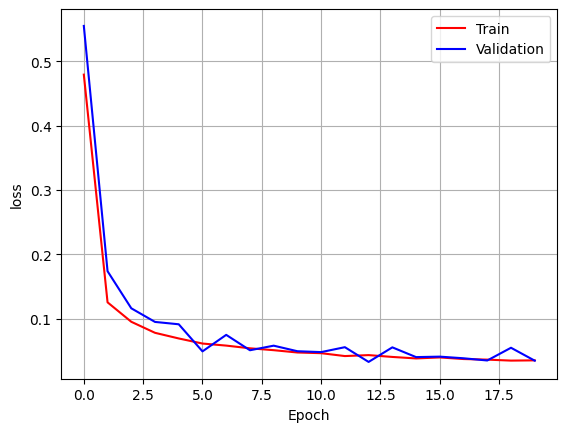

In [36]:
plt.plot(range(epoch_counter), loss_train_hist, 'r-', label='Train')
plt.plot(range(epoch_counter), loss_valid_hist, 'b-', label='Validation')

plt.xlabel('Epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

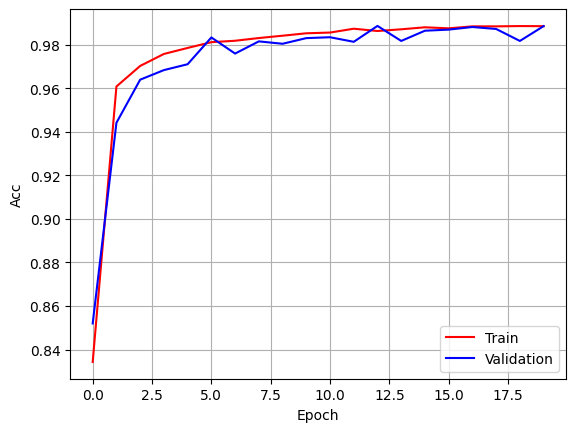

In [37]:
plt.plot(range(epoch_counter), acc_train_hist, 'r-', label='Train')
plt.plot(range(epoch_counter), acc_valid_hist, 'b-', label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.grid(True)
plt.legend()